In [8]:
import numpy as np

1\. Write a function that converts number representation (bin<->dec<->hex)

In [9]:
#to binary
binConv = "01"
#to hexadecimal
hexConv = "0123456789ABCDEF"

def DecToBin(Dec):
    binNum = ""
    while(Dec > 0):
        binNum = binConv[Dec%2] + binNum
        Dec = Dec//2
    return binNum

def DecToHex(Dec):
    hexNum = ""
    while(Dec > 0):
        hexNum = hexConv[Dec%16] + hexNum
        Dec = Dec//16
    return hexNum

def BinToDec(Bin):
    dec = 0
    Bin = Bin[::-1] #reverse order
    for index, value in enumerate(Bin):
        dec = dec + binConv.find(value[:])*2**index
    return dec

def BinToHex(Bin):
    return(DecToHex(BinToDec(Bin)))

def HexToDec(Bin):
    dec = 0
    Bin = Bin[::-1] #reverse order
    for index, value in enumerate(Bin):
        dec = dec + hexConv.find(value[:])*16**index
    return dec

def HexToBin(Bin):
    return(DecToBin(HexToDec(Bin)))
    

#examples
a = 21
print("Decimal Number =", a)
print("Binary =", DecToBin(a))
print("Hexadecimal =", DecToHex(a))
print("\n")

b = "11010"
print("Binary Number =", b)
print("Converted to Dec =", BinToDec(b))
print("Converted to Hex =", BinToHex(b))
print("\n")

c = "F"
print("Hexadecimal Number =", c)
print("Converted to Dec =", HexToDec(c))
print("Converted to Bin =", HexToBin(c))        
    

Decimal Number = 21
Binary = 10101
Hexadecimal = 15


Binary Number = 11010
Converted to Dec = 26
Converted to Hex = 1A


Hexadecimal Number = F
Converted to Dec = 15
Converted to Bin = 1111


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [10]:
import bitstring

def BitToSign(num):
    if(num == "0"): 
        return "+"
    elif(num == "1"): 
        return "-"
    
    
f = -983.2390
# Pack the value as float (32 bit) with MSB in starting position
b = bitstring.pack('>f', f)
# Sign, exponent mantissa bits
sbit, expbits, mantbits = b[:1], b[1:9], b[9:]
print("Input =", f)
print("32-bit Input =", b.bin,"\n")
print("Exponent =", expbits.bin, "--->", expbits.uint - 127) # exponent bias is 127 
print("Mantissa =", mantbits.bin, "--->", 1 + mantbits.uint / (1<<23)) # 1<<23 = 2**23
floatNot = BitToSign(sbit.bin)+" (2**"+str(expbits.uint - 127)+") * ("+str(1 + mantbits.uint / (1<<23))+")"
print("Floating point notation =", floatNot)

Input = -983.239
32-bit Input = 11000100011101011100111101001100 

Exponent = 10001000 ---> 9
Mantissa = 11101011100111101001100 ---> 1.9203886985778809
Floating point notation = - (2**9) * (1.9203886985778809)


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [11]:
a = 1
b = 1

while(a/2 != 0):
    a = a/2
print("Underflow limit =", a)

Underflow limit = 5e-324


In [4]:
while(b+1 > b):
    try:
        b = b*2
    except OverflowError as e:
        print ('Overflowed after ', b, e)

Underflow limit = 5e-324


KeyboardInterrupt: 

4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [13]:
a = 1
b = 1

while(a != a+b/2):
    b = b/2
    
print("machine precision =", b)

machine precision = 2.220446049250313e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [16]:
def std_quad_roots(a,b,c):
    delta=b**2-4*a*c
    if delta < 0:
        print('no real solutions')
        return
    else:     
        x1=1/(2*a)*(-b-np.sqrt(delta))
        x2=1/(2*a)*(-b+np.sqrt(delta))
    return x1,x2

def mod_quad_roots(a,b,c):
    delta=b**2-4*a*c
    if delta < 0:
        print('no real solutions')
        return
    else:     
        x1=(-b+np.sqrt(delta))/(2*a)*(-b-np.sqrt(delta))/(-b+np.sqrt(delta))
        x2=(-b-np.sqrt(delta))/(2*a)*(-b+np.sqrt(delta))/(-b-np.sqrt(delta))
    return x1,x2


def stable_quad_roots(a, b, c):
    delta = b**2 - 4*a*c
    if delta < 0:
        print('no real solutions')
        return
    else:
        if(b<0):
            x1 =  2*c / (-b+delta**0.5)    
            x2 = (-b + delta**0.5) / (2*a) 
        else:
            x1 =  -2*c / (b+delta**0.5)    
            x2 = (-b - delta**0.5) / (2*a) 
        return(x1, x2)

    
a = 0.001
b = 1000
c = 0.001
print("Standard Method:")
x1, x2 = std_quad_roots(a, b, c)
print("x1 =", x1, "\nx2 =", x2)
print("\n\n")
print("Modified Method:")
x1, x2 = mod_quad_roots(a, b, c)
print("x1 =", x1, "\nx2 =", x2)
print("\n\n")
print("Final method:")
x1, x2 = stable_quad_roots(a, b, c)
print("x1 =", x1, "\nx2 =", x2)

Standard Method:
x1 = -999999.999999 
x2 = -9.999894245993346e-07



Modified Method:
x1 = -999999.9999989999 
x2 = -9.999894245993346e-07



Final method:
x1 = -1.000000000001e-06 
x2 = -999999.999999


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

Analitical derivative in x=1 : 1
delta    der        acc
1e-14    0.9992007221626509   0.9992007221626509
1e-12    1.0000889005833413   0.9999110994166587
1e-10    1.000000082840371   0.999999917159629
1e-08    1.0000000039225287   0.9999999960774713
1e-06    1.0000009999177333   0.9999990000822667
0.0001    1.0000999999998899   0.9999000000001101
0.01    1.010000000000001   0.9899999999999991


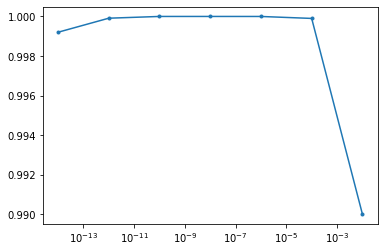

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x=1
def f(x):
    return x*(x-1)

def derivative(f,x,delta):
    return((f(x+delta)-f(x))/delta)

print('Analitical derivative in x=1 :',1)

deltas=np.logspace(-14,-2,7)
accuracies=[]
derivatives=[]
print('delta    der        acc')
for delta in deltas:
    f_prime=derivative(f,x,delta)
    accu=1-abs(1-f_prime)
    print(delta,'  ',f_prime,' ',accu)

    accuracies.append(accu)
    derivatives.append(f_prime)
    
plt.plot(deltas,accuracies,'.-')
plt.xscale('log')
plt.show()

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [19]:
import numpy as np
import time
def semi_circle_integral(N):
    s=0.
    for i in np.arange(1,N+1):
        k=-1+2*i/N
        #k=-1+2*(i-1)/(N-1)
        s+=2/N*np.sqrt(1-(k)**2)
    return s


N=[100,245000,2e7]

for n in N:
    start=time.time()
    I=semi_circle_integral(n)
    acc = 1-abs(np.pi/2 - I) / (np.pi/2)
    end=time.time()
    print('N = ',n)
    print('I = ',I,' Time: ',np.round(end-start,5),'s',
          " Accuracy: ",acc,'\n')


N =  100
I =  1.5691342555492505  Time:  0.00044 s  Accuracy:  0.9989418925819381 

N =  245000
I =  1.570796313080845  Time:  0.91233 s  Accuracy:  0.9999999912693637 

N =  20000000.0
I =  1.570796326776609  Time:  80.8821 s  Accuracy:  0.9999999999883578 

